In [1]:
# Import required dependencies
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pandas as pd

# Add the parent directory to sys.path
parent_dir = os.path.abspath("..")
sys.path.insert(0, parent_dir)

# Import custom modules
import packer
import evaluator
import divider

# create instances
GPU_TYPES = ["DGX-B300", "H200", "Rubin-NVL144", "H800", "H20"]

# Configure matplotlib
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

# constants
FIGURE_SAVE_LOCATION = "../data/figures/05evaluate/"
FIGURE_PREFILE = "outer_comp_"

In [2]:
# Load azure_conv_dir
azure_conv_dir = "../data/outer/het-azure-conv"
azure_conv_data = {}

# for each folder in the batch directory
index = 0
for folder in os.listdir(azure_conv_dir):
    folder_path = os.path.join(azure_conv_dir, folder)
    if os.path.isdir(folder_path):
        # split the filename with _
        folder_name_parts = folder.split("_")

        data = {
            "batch": 8,
            "iteration": 15,
            "runs": 5,
            "timestamps_data": {},
            "trial_data": {},
            "inventory": {},
            "details": {}
        }

        # extract inventory from the folder name (azure_conv_{'_'.join(f'{k}-{v}' for k, v in inventory.items())})
        inventory = {}
        for part in folder_name_parts[3:]:
            # if more than one dash, split by the second dash
            if part.count('-') == 2:
                key, key2, value = part.split('-')
                inventory[f"{key}-{key2}"] = value
            else:
                key, value = part.split('-')
                inventory[key] = value
        data["inventory"] = inventory

        # for each file in the folder
        for file in os.listdir(folder_path):
            if file.endswith(".csv"):
                # remove the .csv extension
                file = file[:-4]

                # split the filename with _
                file_name_parts = file.split("_")

                # if ends with _timestamps.csv, read the timestamps
                if file_name_parts[-1] == "timestamps":
                    timestamps_df = pd.read_csv(os.path.join(folder_path, file + ".csv"))
                    data["timestamps_data"][file_name_parts[1]] = timestamps_df
                else:
                    # otherwise read the trial data
                    trial_df = pd.read_csv(os.path.join(folder_path, file + ".csv"))

                    # do rho_max calculations
                    trial_df['inv_rho'] = 1 / trial_df['rho_max']

                    # add a inv_rho_inc (which shows value of inv_rho until the highest is reached, then just the highest value)
                    trial_df['inv_rho_inc'] = trial_df['inv_rho'].cummax()

                    # extract the details of the row with the highest inv_rho_inc
                    details = trial_df.loc[trial_df['inv_rho_inc'].idxmax()].filter(regex='^(num_islands_|skew_exponent_)')
                    details = details.to_dict()
                    data["details"][file_name_parts[1]] = details

                    data["trial_data"][file_name_parts[1]] = trial_df

        # add the data to the azure_conv_data dictionary
        azure_conv_data[folder] = data

In [3]:
# print root elements of azure_conv_data
for key, value in azure_conv_data.items():
    print(f"{key}: {value['batch']}, {value['iteration']}, {value['runs']}")
    print(f"Timestamps data: {list(value['timestamps_data'].keys())}")
    print(f"Trial data: {list(value['trial_data'].keys())}")
    print()

het_azure_conv_H200-32_H800-128_H20-128: 8, 15, 5
Timestamps data: ['4', '3', '2', '5', '1']
Trial data: ['4', '5', '1', '2', '3']

het_azure_conv_H200-64_H800-64_H20-128: 8, 15, 5
Timestamps data: ['4', '3', '2', '5', '1']
Trial data: ['4', '5', '1', '2', '3']

het_azure_conv_H200-128: 8, 15, 5
Timestamps data: ['4', '3', '2', '5', '1']
Trial data: ['4', '5', '1', '2', '3']



In [4]:
# Load azure_code_dir
azure_code_dir = "../data/outer/het-azure-code"
azure_code_data = {}

# for each folder in the batch directory
index = 0
for folder in os.listdir(azure_code_dir):
    folder_path = os.path.join(azure_code_dir, folder)
    if os.path.isdir(folder_path):
        # split the filename with _
        folder_name_parts = folder.split("_")

        data = {
            "batch": 8,
            "iteration": 15,
            "runs": 5,
            "timestamps_data": {},
            "trial_data": {},
            "inventory": {},
            "details": {}
        }

        # extract inventory from the folder name (azure_conv_{'_'.join(f'{k}-{v}' for k, v in inventory.items())})
        inventory = {}
        for part in folder_name_parts[3:]:
            # if more than one dash, split by the second dash
            if part.count('-') == 2:
                key, key2, value = part.split('-')
                inventory[f"{key}-{key2}"] = value
            else:
                key, value = part.split('-')
                inventory[key] = value
        data["inventory"] = inventory

        # for each file in the folder
        for file in os.listdir(folder_path):
            if file.endswith(".csv"):
                # remove the .csv extension
                file = file[:-4]

                # split the filename with _
                file_name_parts = file.split("_")

                # if ends with _timestamps.csv, read the timestamps
                if file_name_parts[-1] == "timestamps":
                    timestamps_df = pd.read_csv(os.path.join(folder_path, file + ".csv"))
                    data["timestamps_data"][file_name_parts[1]] = timestamps_df
                else:
                    # otherwise read the trial data
                    trial_df = pd.read_csv(os.path.join(folder_path, file + ".csv"))

                    # do rho_max calculations
                    trial_df['inv_rho'] = 1 / trial_df['rho_max']

                    # add a inv_rho_inc (which shows value of inv_rho until the highest is reached, then just the highest value)
                    trial_df['inv_rho_inc'] = trial_df['inv_rho'].cummax()

                    # extract the details of the row with the highest inv_rho_inc
                    details = trial_df.loc[trial_df['inv_rho_inc'].idxmax()].filter(regex='^(num_islands_|skew_exponent_)')
                    details = details.to_dict()
                    data["details"][file_name_parts[1]] = details

                    data["trial_data"][file_name_parts[1]] = trial_df

        # add the data to the azure_code_data dictionary
        azure_code_data[folder] = data

a: het_azure_conv_H200-32_H800-128_H20-128 - Inventory: H200: 32, H800: 128, H20: 128
b: het_azure_conv_H200-64_H800-64_H20-128 - Inventory: H200: 64, H800: 64, H20: 128
c: het_azure_conv_H200-128 - Inventory: H200: 128


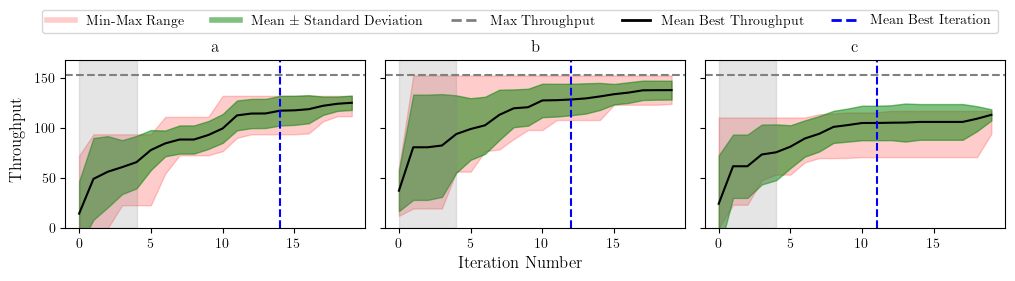

In [5]:
# Plot each azure conv in a separate subplot (averaged)

# set colour cycle for plots
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.gist_rainbow(np.linspace(0, 1, 10)))
fig, axes = plt.subplots(1, 3, figsize=(10, 2.5), sharex=True, sharey=True)

# sort the azure_conv_data by highest number of value sum in inventory
azure_conv_data = dict(sorted(azure_conv_data.items(), key=lambda item: sum(int(v) for v in item[1]['inventory'].values()), reverse=True))

max_rho = 0.0

for i, (name, data) in enumerate(azure_conv_data.items()):
    ax = axes[i]

    all_trials = pd.concat(data["trial_data"].values(), ignore_index=True)
    summary = (
        all_trials
        .groupby("trial_index")["inv_rho_inc"]
        .agg(['mean', 'min', 'max', 'std'])
        .reset_index()
    )

    # update max_rho if the current max is greater
    max_rho = max(max_rho, summary["max"].max())

    # plot mean line
    ax.plot(summary["trial_index"], summary["mean"], color='black')

    # fill area between min and max
    ax.fill_between(
        summary["trial_index"],
        summary["min"],
        summary["max"],
        color='red',
        alpha=0.2
    )

    # fill area between mean and std
    ax.fill_between(
        summary["trial_index"],
        summary["mean"] - summary["std"],
        summary["mean"] + summary["std"],
        color='green',
        alpha=0.5
    )

    # put a/b/c in the title then i will include a table for the inventory
    ax.set_title(chr(ord('a') + i))
    ax.axvspan(0, 4.0, color='gray', alpha=0.2)

    # print what the inventory is (to console) with title char
    inventory_str = ', '.join(f"{k}: {v}" for k, v in data["inventory"].items())
    print(f"{chr(ord('a') + i)}: {name} - Inventory: {inventory_str}")

    # get the best trial_index per trial, then take their mean
    best_iters = [
        df.groupby('trial_index')['inv_rho_inc']
          .max()
          .idxmax()
        for df in data["trial_data"].values()
    ]
    mean_best = np.mean(best_iters)
    ax.axvline(
        mean_best,
        color='blue',
        linestyle='--',
        label=f'Mean Best Iteration: {mean_best:.1f}'
    )

# add a horizontal line at max_rho
for ax in axes.flat:
    ax.axhline(max_rho, color='gray', linestyle='--', label='Max Throughput')
    ax.set_ylim(0, max_rho * 1.1)

# shared axis labels
fig.text(0.5, -0.01, r'Iteration Number', ha='center', fontsize=12)
fig.text(-0.01, 0.5, r'Throughput', va='center', rotation='vertical', fontsize=12)

# Add a legend for red and green areas
handles = [
    plt.Line2D([0], [0], color='red', lw=4, label='Min-Max Range', alpha=0.2),
    plt.Line2D([0], [0], color='green', lw=4, label='Mean ± Standard Deviation', alpha=0.5),
    plt.Line2D([0], [0], color='gray', lw=2, linestyle='--', label='Max Throughput'),
    plt.Line2D([0], [0], color='black', lw=2, label='Mean Best Throughput'),
    plt.Line2D([0], [0], color='blue', lw=2, linestyle='--', label='Mean Best Iteration')
]
fig.legend(handles=handles, loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.05))
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(f"{FIGURE_SAVE_LOCATION}{FIGURE_PREFILE}azure_conv_error_area.pdf", bbox_inches='tight')

a: het_azure_code_H200-32_H800-128_H20-128 - Inventory: H200: 32, H800: 128, H20: 128
b: het_azure_code_H200-64_H800-64_H20-128 - Inventory: H200: 64, H800: 64, H20: 128
c: het_azure_code_H200-128 - Inventory: H200: 128


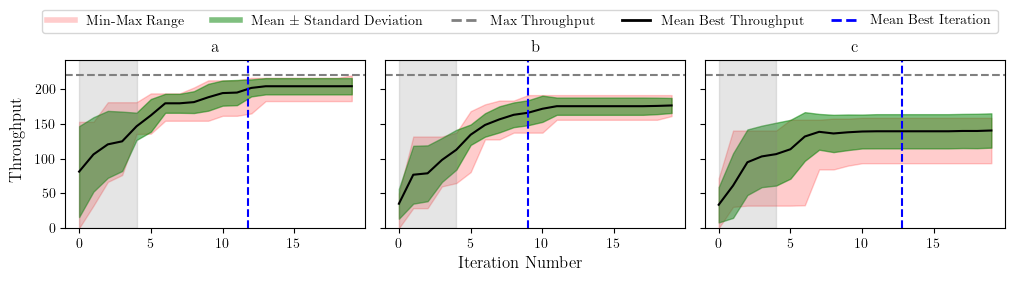

In [6]:
# Plot each azure conv in a separate subplot (averaged)

# set colour cycle for plots
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.gist_rainbow(np.linspace(0, 1, 10)))
fig, axes = plt.subplots(1, 3, figsize=(10, 2.5), sharex=True, sharey=True)

# sort the azure_code_data by highest number of value sum in inventory
azure_code_data = dict(sorted(azure_code_data.items(), key=lambda item: sum(int(v) for v in item[1]['inventory'].values()), reverse=True))

max_rho = 0.0

for i, (name, data) in enumerate(azure_code_data.items()):
    ax = axes[i]

    all_trials = pd.concat(data["trial_data"].values(), ignore_index=True)
    summary = (
        all_trials
        .groupby("trial_index")["inv_rho_inc"]
        .agg(['mean', 'min', 'max', 'std'])
        .reset_index()
    )

    # update max_rho if the current max is greater
    max_rho = max(max_rho, summary["max"].max())

    # plot mean line
    ax.plot(summary["trial_index"], summary["mean"], color='black')

    # fill area between min and max
    ax.fill_between(
        summary["trial_index"],
        summary["min"],
        summary["max"],
        color='red',
        alpha=0.2
    )

    # fill area between mean and std
    ax.fill_between(
        summary["trial_index"],
        summary["mean"] - summary["std"],
        summary["mean"] + summary["std"],
        color='green',
        alpha=0.5
    )

    # put a/b/c in the title then i will include a table for the inventory
    ax.set_title(chr(ord('a') + i))
    ax.axvspan(0, 4.0, color='gray', alpha=0.2)

    # print what the inventory is (to console) with title char
    inventory_str = ', '.join(f"{k}: {v}" for k, v in data["inventory"].items())
    print(f"{chr(ord('a') + i)}: {name} - Inventory: {inventory_str}")

    # get the best trial_index per trial, then take their mean
    best_iters = [
        df.groupby('trial_index')['inv_rho_inc']
          .max()
          .idxmax()
        for df in data["trial_data"].values()
    ]
    mean_best = np.mean(best_iters)
    ax.axvline(
        mean_best,
        color='blue',
        linestyle='--',
        label=f'Mean Best Iteration: {mean_best:.1f}'
    )

# add a horizontal line at max_rho
for ax in axes.flat:
    ax.axhline(max_rho, color='gray', linestyle='--', label='Max Throughput')
    ax.set_ylim(0, max_rho * 1.1)

# shared axis labels
fig.text(0.5, -0.01, r'Iteration Number', ha='center', fontsize=12)
fig.text(-0.01, 0.5, r'Throughput', va='center', rotation='vertical', fontsize=12)

# Add a legend for red and green areas
handles = [
    plt.Line2D([0], [0], color='red', lw=4, label='Min-Max Range', alpha=0.2),
    plt.Line2D([0], [0], color='green', lw=4, label='Mean ± Standard Deviation', alpha=0.5),
    plt.Line2D([0], [0], color='gray', lw=2, linestyle='--', label='Max Throughput'),
    plt.Line2D([0], [0], color='black', lw=2, label='Mean Best Throughput'),
    plt.Line2D([0], [0], color='blue', lw=2, linestyle='--', label='Mean Best Iteration')
]
fig.legend(handles=handles, loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.05))
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(f"{FIGURE_SAVE_LOCATION}{FIGURE_PREFILE}azure_conv_error_area.pdf", bbox_inches='tight')

In [7]:
# converation AzureLLM
trace_pdf = evaluator.load_trace_pdf("../traces/conv_context_tokens_hist.csv")
decode_len_avg = 106
decode_len_max = 1500
conv_packer = packer.Packer(GPU_TYPES, gpu_info_file='../device/gpu_info.csv')

experiment_eval = {}

# for each experiment
for i, (name, data) in enumerate(azure_conv_data.items()):
    trial_eval = {}

    # for each trial
    for trial_name, trial_df in data["trial_data"].items():
        # extract islands
        gpus = {}

        # for each item in the inventory
        for item, value in data["inventory"].items():
            # check if num_islands_item is in the details
            if f"num_islands_{item}" in data["details"][trial_name] and f"skew_exponent_{item}" in data["details"][trial_name]:
                num_islands = data["details"][trial_name][f"num_islands_{item}"]
                skew_exponent = data["details"][trial_name][f"skew_exponent_{item}"]

                islands = divider.island_divider(
                    total_gpus_for_type= int(value),
                    num_islands_target= int(num_islands),
                    size_distribution_skew_exponent= float(skew_exponent),
                    min_island_size=2
                )

                gpus[item] = islands
                
        # create islands based on the configuration
        islands = []
        for gpu_type, sizes in gpus.items():
            for idx, size in enumerate(sizes):
                new_island = evaluator.Island(
                    id=f"{gpu_type}_{idx}",
                    gpu_type=gpu_type,
                    size=size,
                )
                islands.append(new_island)
        islands_dict = {island.id: island for island in islands}

        # pack the GPUs
        print(f"Packing inventory: {data['inventory']} for trial {trial_name} in {name}")
        _, prefill_throughput, decode_throughput, delta, _ = conv_packer.solve_linear(
            islands_dict, trace_pdf, decode_len_avg, decode_len_max, resolution=100, print_debug=False # Set print_debug as needed
        )
        
        # store the evaluation results
        trial_eval[trial_name] = {
            "prefill_throughput": prefill_throughput,
            "decode_throughput": decode_throughput,
            "delta": delta,
            "gpus": gpus
        }

    # store the trial evaluation results
    experiment_eval[name] = {
        "trial_eval": trial_eval,
        "inventory": data["inventory"]
    }

Packing inventory: {'H200': '32', 'H800': '128', 'H20': '128'} for trial 4 in het_azure_conv_H200-32_H800-128_H20-128

=== Packer ===
*** Forming Ranges ***
*** Prefill GPU Config ***
*** Decode GPU Config ***
*** Creating Problem ***
*** Solving Problem ***

=== Overall Stats ===
  Prefill Throughput: 176.4601 requests/s
  Decode Throughput: 128.5922 requests/s
  Total Deviation: 49.8544
  Objective: -4461.2260
Packing inventory: {'H200': '32', 'H800': '128', 'H20': '128'} for trial 5 in het_azure_conv_H200-32_H800-128_H20-128

=== Packer ===
*** Forming Ranges ***
*** Prefill GPU Config ***
*** Decode GPU Config ***
*** Creating Problem ***
*** Solving Problem ***

=== Overall Stats ===
  Prefill Throughput: 196.6761 requests/s
  Decode Throughput: 123.8133 requests/s
  Total Deviation: 75.0288
  Objective: -6848.9733
Packing inventory: {'H200': '32', 'H800': '128', 'H20': '128'} for trial 1 in het_azure_conv_H200-32_H800-128_H20-128

=== Packer ===
*** Forming Ranges ***
*** Prefill

Average throughput for het_azure_conv_H200-32_H800-128_H20-128: 125.46 tokens/s
Min throughput: 113.06 (-12.40) tokens/s
Max throughput: 131.43 (+5.97) tokens/s
Average throughput for het_azure_conv_H200-64_H800-64_H20-128: 138.37 tokens/s
Min throughput: 122.55 (-15.82) tokens/s
Max throughput: 148.97 (+10.60) tokens/s
Average throughput for het_azure_conv_H200-128: 114.13 tokens/s
Min throughput: 109.03 (-5.10) tokens/s
Max throughput: 116.83 (+2.70) tokens/s


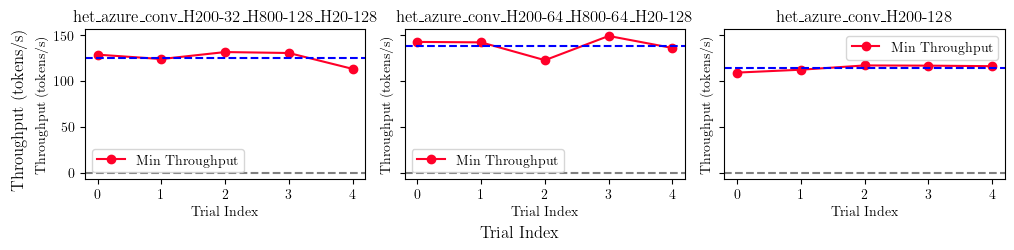

In [8]:
# plot the throughput for each experiment
fig, axes = plt.subplots(1, 3, figsize=(10, 2.5), sharex=True, sharey=True)
# set colour cycle for plots
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.gist_rainbow(np.linspace(0, 1, 10)))  

for i, (name, data) in enumerate(experiment_eval.items()):
    ax = axes[i]
    trial_eval = data["trial_eval"]

    # plot the lower of prefill and decode throughput per trial
    lower_throughputs = [
        min(trial["prefill_throughput"], trial["decode_throughput"])
        for trial in trial_eval.values()
    ]
    ax.plot(lower_throughputs, label='Min Throughput', marker='o')
    ax.legend()

    # set title and labels
    ax.set_title(name)
    ax.set_xlabel('Trial Index')
    ax.set_ylabel('Throughput (tokens/s)')
    ax.axhline(0, color='gray', linestyle='--')

    # add a horizontal line at the average throughput
    avg_throughput = np.mean(lower_throughputs)
    min_throughput = min(lower_throughputs)
    max_throughput = max(lower_throughputs)
    print(f"Average throughput for {name}: {avg_throughput:.2f} tokens/s")
    print(f"Min throughput: {min_throughput:.2f} ({min_throughput - avg_throughput:+.2f}) tokens/s")
    print(f"Max throughput: {max_throughput:.2f} ({max_throughput - avg_throughput:+.2f}) tokens/s")
    ax.axhline(avg_throughput, color='blue', linestyle='--', label=f'Avg Throughput: {avg_throughput:.2f}')

# shared axis labels
fig.text(0.5, -0.01, r'Trial Index', ha='center', fontsize=12)
fig.text(-0.01, 0.5, r'Throughput (tokens/s)', va='center', rotation='vertical', fontsize=12)
# adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Average delta for het_azure_conv_H200-32_H800-128_H20-128: 45.52 tokens/s
Min delta: -0.00 (-45.52) tokens/s
Max delta: 88.77 (+43.25) tokens/s
Average delta for het_azure_conv_H200-64_H800-64_H20-128: 5.31 tokens/s
Min delta: -0.00 (-5.31) tokens/s
Max delta: 14.55 (+9.24) tokens/s
Average delta for het_azure_conv_H200-128: 7.08 tokens/s
Min delta: 0.00 (-7.08) tokens/s
Max delta: 16.79 (+9.71) tokens/s


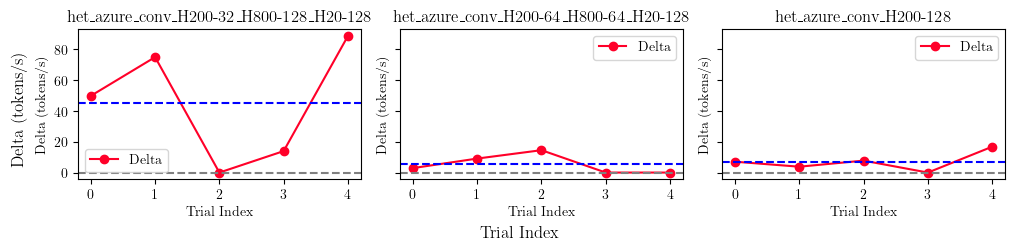

In [9]:
# plot the delta for each experiment
fig, axes = plt.subplots(1, 3, figsize=(10, 2.5), sharex=True, sharey=True)
# set colour cycle for plots
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.gist_rainbow(np.linspace(0, 1, 10)))
for i, (name, data) in enumerate(experiment_eval.items()):
    ax = axes[i]
    trial_eval = data["trial_eval"]

    # plot the delta per trial
    deltas = [trial["delta"] for trial in trial_eval.values()]
    ax.plot(deltas, label='Delta', marker='o')
    ax.legend()

    # set title and labels
    ax.set_title(name)
    ax.set_xlabel('Trial Index')
    ax.set_ylabel('Delta (tokens/s)')
    ax.axhline(0, color='gray', linestyle='--')
    # add a horizontal line at the average delta
    avg_delta = np.mean(deltas)
    min_delta = min(deltas)
    max_delta = max(deltas)
    print(f"Average delta for {name}: {avg_delta:.2f} tokens/s")
    print(f"Min delta: {min_delta:.2f} ({min_delta - avg_delta:+.2f}) tokens/s")
    print(f"Max delta: {max_delta:.2f} ({max_delta - avg_delta:+.2f}) tokens/s")
    ax.axhline(avg_delta, color='blue', linestyle='--', label=f'Avg Delta: {avg_delta:.2f}')
# shared axis labels
fig.text(0.5, -0.01, r'Trial Index', ha='center', fontsize=12)
fig.text(-0.01, 0.5, r'Delta (tokens/s)', va='center', rotation='vertical', fontsize=12)
# adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [10]:
# code AzureLLM
trace_pdf = evaluator.load_trace_pdf("../traces/code_context_tokens_hist.csv")
decode_len_avg = 22
decode_len_max = 5000
code_packer = packer.Packer(GPU_TYPES, gpu_info_file='../device/gpu_info.csv')

experiment_eval = {}

# for each experiment
for i, (name, data) in enumerate(azure_code_data.items()):
    trial_eval = {}

    # for each trial
    for trial_name, trial_df in data["trial_data"].items():
        # extract islands
        gpus = {}

        # for each item in the inventory
        for item, value in data["inventory"].items():
            # check if num_islands_item is in the details
            if f"num_islands_{item}" in data["details"][trial_name] and f"skew_exponent_{item}" in data["details"][trial_name]:
                num_islands = data["details"][trial_name][f"num_islands_{item}"]
                skew_exponent = data["details"][trial_name][f"skew_exponent_{item}"]

                islands = divider.island_divider(
                    total_gpus_for_type= int(value),
                    num_islands_target= int(num_islands),
                    size_distribution_skew_exponent= float(skew_exponent),
                    min_island_size=2
                )

                gpus[item] = islands
                
        # create islands based on the configuration
        islands = []
        for gpu_type, sizes in gpus.items():
            for idx, size in enumerate(sizes):
                new_island = evaluator.Island(
                    id=f"{gpu_type}_{idx}",
                    gpu_type=gpu_type,
                    size=size,
                )
                islands.append(new_island)
        islands_dict = {island.id: island for island in islands}

        # pack the GPUs
        print(f"Packing inventory: {data['inventory']} for trial {trial_name} in {name}")
        _, prefill_throughput, decode_throughput, delta, _ = code_packer.solve_linear(
            islands_dict, trace_pdf, decode_len_avg, decode_len_max, resolution=100, print_debug=False # Set print_debug as needed
        )
        
        # store the evaluation results
        trial_eval[trial_name] = {
            "prefill_throughput": prefill_throughput,
            "decode_throughput": decode_throughput,
            "delta": delta,
            "gpus": gpus
        }

    # store the trial evaluation results
    experiment_eval[name] = {
        "trial_eval": trial_eval,
        "inventory": data["inventory"]
    }

Packing inventory: {'H200': '32', 'H800': '128', 'H20': '128'} for trial 4 in het_azure_code_H200-32_H800-128_H20-128

=== Packer ===
*** Forming Ranges ***
*** Prefill GPU Config ***
*** Decode GPU Config ***
*** Creating Problem ***
*** Solving Problem ***

=== Overall Stats ===
  Prefill Throughput: 178.5629 requests/s
  Decode Throughput: 183.6592 requests/s
  Total Deviation: 8.3742
  Objective: -448.1114
Packing inventory: {'H200': '32', 'H800': '128', 'H20': '128'} for trial 5 in het_azure_code_H200-32_H800-128_H20-128

=== Packer ===
*** Forming Ranges ***
*** Prefill GPU Config ***
*** Decode GPU Config ***
*** Creating Problem ***
*** Solving Problem ***

=== Overall Stats ===
  Prefill Throughput: 203.2906 requests/s
  Decode Throughput: 232.2671 requests/s
  Total Deviation: 33.8826
  Objective: -2869.0430
Packing inventory: {'H200': '32', 'H800': '128', 'H20': '128'} for trial 1 in het_azure_code_H200-32_H800-128_H20-128

=== Packer ===
*** Forming Ranges ***
*** Prefill G